# Amplitude Estimation Benchmarking Results

In [1]:
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# get results files
filenames = listdir('results/')
filenames.remove('results_template.csv')
filenames = ['results/' + filename for filename in filenames]

In [3]:
# initialize dataframe from template
df = pd.read_csv('results/results_template.csv')
df = df.drop(index=range(len(df)))

# append data from files
for filename in filenames:
    df = df.append(pd.read_csv(filename), sort=True)    

In [4]:
# extract possible values
algorithms = sorted(df['algorithm'].unique())
a_targets = sorted(df['a_target'].unique())
epsilon_targets = sorted(df['epsilon_target'].unique())
alphas = sorted(df['alpha'].unique())

# $\epsilon$ dependency

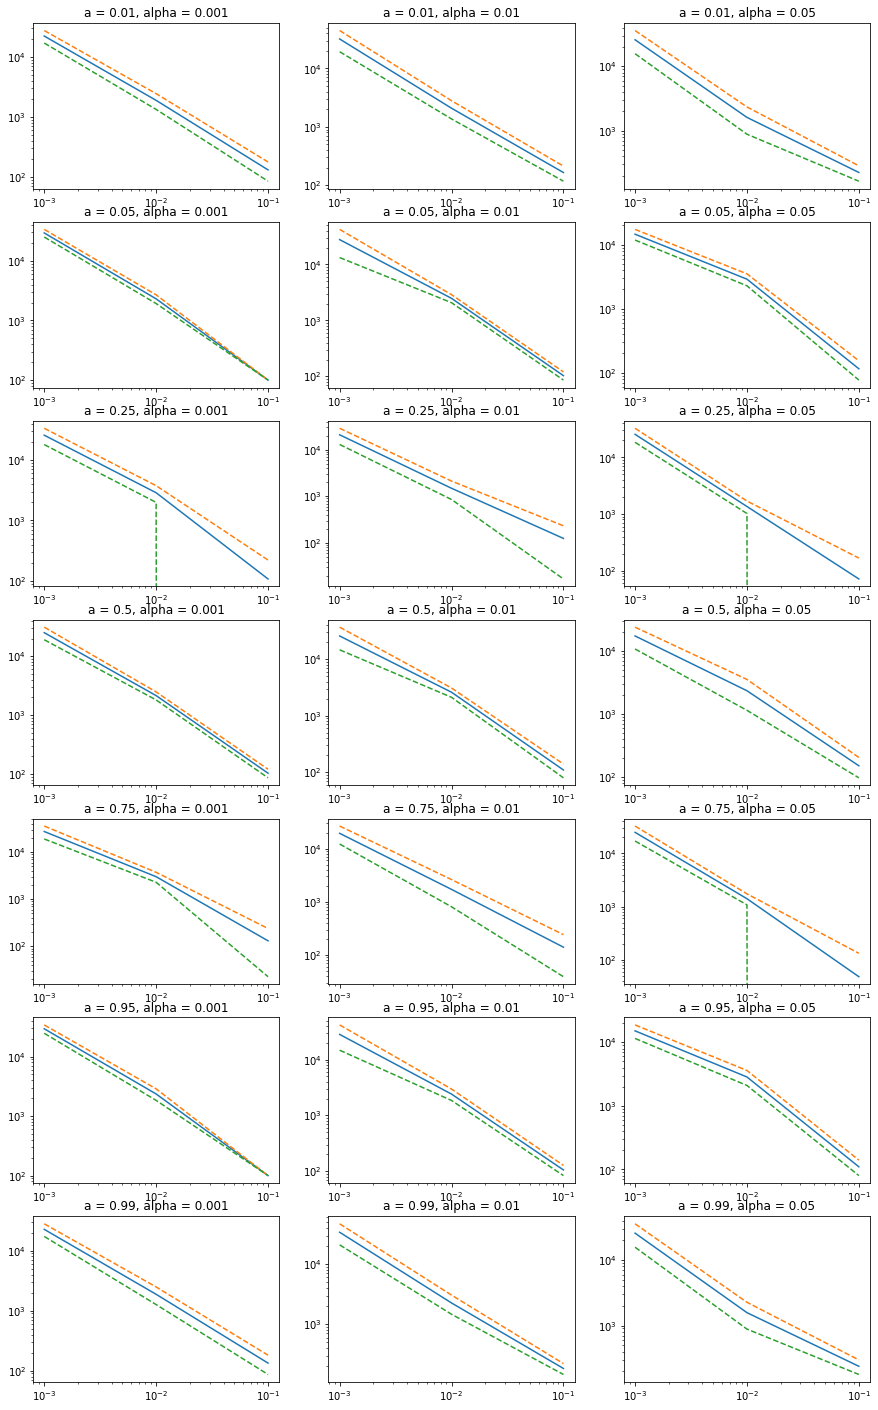

In [5]:
# loop over settings
plt.subplots(len(a_targets), len(alphas), figsize=(15,25))
for i, a in enumerate(a_targets):
    for j, alpha in enumerate(alphas):
        
        plt.subplot(len(a_targets), len(alphas), i*len(alphas) + j + 1)
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['a_target'] == a) & 
                     (df['alpha'] == alpha) & 
                     (df['algorithm'] == algorithm)].sort_values('epsilon_target')
            
            # extract x/y data
            x = df_['epsilon_target']
            y = df_['mean_oracle_calls']
            dy = df_['stdev_oracle_calls']

            plt.loglog(x, y, label='algorithm')
            plt.loglog(x, y + dy, '--')
            plt.loglog(x, y - dy, '--')
        
        plt.title(f'a = {a}, alpha = {alpha}')
        
plt.show()


## $a$ dependency

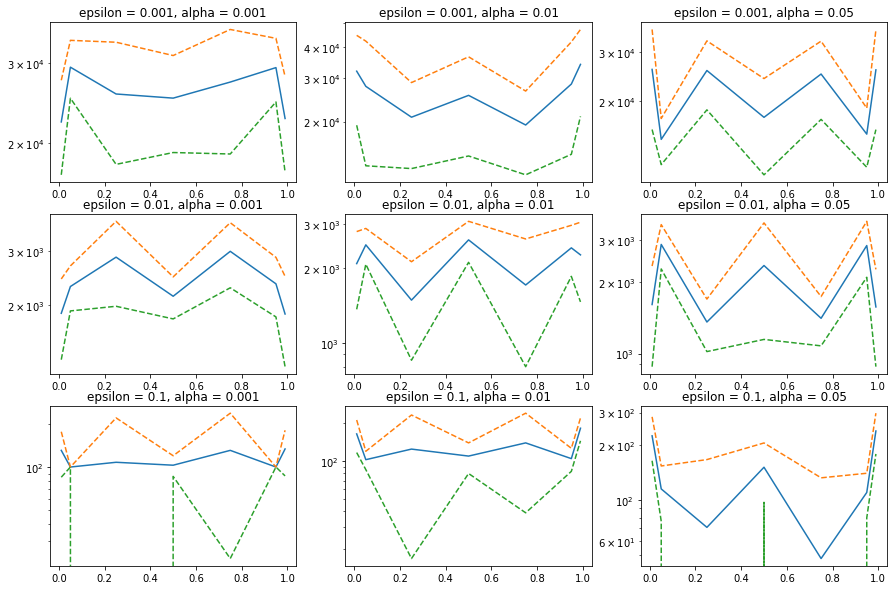

In [6]:
# loop over settings
plt.subplots(len(epsilon_targets), len(alphas), figsize=(15,10))
for i, epsilon in enumerate(epsilon_targets):
    for j, alpha in enumerate(alphas):
        
        plt.subplot(len(epsilon_targets), len(alphas), i*len(alphas) + j + 1)
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['epsilon_target'] == epsilon) & 
                     (df['alpha'] == alpha) & 
                     (df['algorithm'] == algorithm)].sort_values('a_target')
            
            # extract x/y data
            x = df_['a_target']
            y = df_['mean_oracle_calls']
            dy = df_['stdev_oracle_calls']

            plt.semilogy(x, y, label='algorithm')
            plt.semilogy(x, y + dy, '--')
            plt.semilogy(x, y - dy, '--')
        
        plt.title(f'epsilon = {epsilon}, alpha = {alpha}')
        
plt.show()

## $\alpha$ dependency

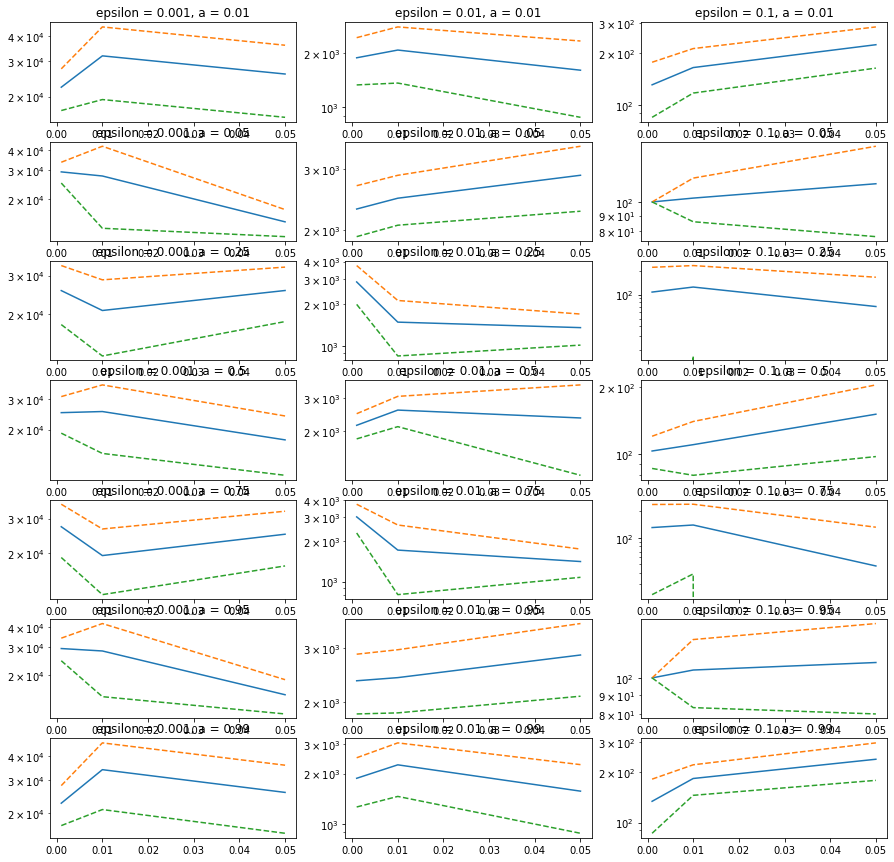

In [7]:
# loop over settings
plt.subplots(len(a_targets), len(epsilon_targets), figsize=(15,15))
for i, epsilon in enumerate(epsilon_targets):
    for j, a in enumerate(a_targets):
        
        plt.subplot(len(a_targets), len(epsilon_targets), j*len(epsilon_targets) + i + 1)
        for algorithm in algorithms:

            # filter data
            df_ = df[(df['epsilon_target'] == epsilon) & 
                     (df['a_target'] == a) & 
                     (df['algorithm'] == algorithm)].sort_values('alpha')
            
            # extract x/y data
            x = df_['alpha']
            y = df_['mean_oracle_calls']
            dy = df_['stdev_oracle_calls']

            plt.semilogy(x, y, label='algorithm')
            plt.semilogy(x, y + dy, '--')
            plt.semilogy(x, y - dy, '--')
        
        plt.title(f'epsilon = {epsilon}, a = {a}')
        
plt.show()